<a href="https://colab.research.google.com/github/brittabeta/Data-Extraction/blob/main/Copy_of_SpeedTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Internet Performance Analysis
#### About Speedtest
Download speeds were collected via webscrapping, as there is no API, from the [Speedtest Global Index](https://www.speedtest.net/global-index).  The Speedtest Global Index ranks global internet performance by country and the world's largest countries by download speed reported in megabits per second (Mbps).  Ookla is the company behind Speedtest which provides worldwide internet performance and accessibility analytics.  This data is often cited in technology media coverage, and utilized by ISPs, carriers, businesses, universities and government agencies.  Data comes from hundreds of millions of tests taken by real people using Speedtest every month.  This data is then aggregated to represent the typical internet performance experience by location. One can even contribute to Speedtest data by performing a test available at [speedtest.net](https://www.speedtest.net/).
#### United Nations Conference on Trade and Development (UNCTAD) 
UNCTAD analyzes the global technology economy in addition to other studies.  The frontier technology readiness index is calculated annually, most recent report available from [UNCTAD](https://unctadstat.unctad.org/wds) is from 2019. Overall index is an index to assess country readiness for using, adopting and adapting.  This measure is calculated from internet technology and communication (ICT) deployment, skills, research and development activity, industry activity and access to finance using principal component analysis (PCA).
### Analysis Purpose
To assess the association between the technology economy and internet download performance.  Looking at both the individual components of the UNCTAD index and overall index.  The potential impacts include: understanding user experience, potential business location benefits or challenges, travel expectations, and global needs for improvement.

# Prepare environment and data

In [1]:
!pip install openpyxl # for handling excel files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# imports for arrays dataframes visuals and calculations
import numpy as np 
import pandas as pd 
import seaborn as sns 
import scipy.stats as stats 
%matplotlib inline 
import matplotlib.pyplot as plt 

In [ ]:
path1 = '/content/fixedCitiesMedian.xlsx'  # to load raw files
path2 ='/content/mobileCitiesMedian.xlsx'
path3 = '/content/fixedMedian.xlsx'
path4 = '/content/mobileMedian.xlsx'

In [ ]:
evens = range(2,501,2) # to clean raw files
dfcf = pd.read_excel(path1, header=0, skiprows=evens) # load and clean
dfcf.head()

,City,Mbps,Month,Name
0,"Beijing, China",264.92,March 2023,fixedCitiesMedian
1,"Abu Dhabi, United Arab Emirates",261.97,March 2023,fixedCitiesMedian
2,"Shanghai, China",232.08,March 2023,fixedCitiesMedian
3,"Bangkok, Thailand",224.67,March 2023,fixedCitiesMedian
4,"New York, United States",224.41,March 2023,fixedCitiesMedian


In [ ]:
dfcm = pd.read_excel(path2, header=0, skiprows=evens)
dfcm.head()

,City,Mbps,Month,Name
0,"Ar-Rayyan, Qatar",223.87,March 2023,mobileCitiesMedian
1,"Dubai, United Arab Emirates",210.70,March 2023,mobileCitiesMedian
2,"Copenhagen, Denmark",198.92,March 2023,mobileCitiesMedian
3,"Abu Dhabi, United Arab Emirates",179.63,March 2023,mobileCitiesMedian
4,"Oslo, Norway",177.06,March 2023,mobileCitiesMedian


In [ ]:
dfgf = pd.read_excel(path3, header=0, skiprows=evens)
dfgf.head()

,Country,Mbps,Month,Name
0,Singapore,235.40,March 2023,fixedMedian
1,United Arab Emirates,221.87,March 2023,fixedMedian
2,Chile,220.39,March 2023,fixedMedian
3,China,216.83,March 2023,fixedMedian
4,Denmark,203.78,March 2023,fixedMedian


In [ ]:
dfgm = pd.read_excel(path4, header=0, skiprows=evens)
dfgm.head()

,Country,Mbps,Month,Name
0,United Arab Emirates,178.25,March 2023,mobileMedian
1,Qatar,174.56,March 2023,mobileMedian
2,Norway,143.55,March 2023,mobileMedian
3,Kuwait,135.63,March 2023,mobileMedian
4,Denmark,129.95,March 2023,mobileMedian


In [ ]:
dfcf[['City', 'Country']] = dfcf.City.str.split(',', expand=True) # split location into city and country
dfcf.head()

,City,Mbps,Month,Name,Country
0,Beijing,264.92,March 2023,fixedCitiesMedian,China
1,Abu Dhabi,261.97,March 2023,fixedCitiesMedian,United Arab Emirates
2,Shanghai,232.08,March 2023,fixedCitiesMedian,China
3,Bangkok,224.67,March 2023,fixedCitiesMedian,Thailand
4,New York,224.41,March 2023,fixedCitiesMedian,United States


In [ ]:
dfcm[['City', 'Country']] = dfcm.City.str.split(',', expand=True)
dfcm.head()

,City,Mbps,Month,Name,Country
0,Ar-Rayyan,223.87,March 2023,mobileCitiesMedian,Qatar
1,Dubai,210.70,March 2023,mobileCitiesMedian,United Arab Emirates
2,Copenhagen,198.92,March 2023,mobileCitiesMedian,Denmark
3,Abu Dhabi,179.63,March 2023,mobileCitiesMedian,United Arab Emirates
4,Oslo,177.06,March 2023,mobileCitiesMedian,Norway


In [ ]:
# rename to match UNCTAD file
renamelist = ['The Bahamas', 'The Gambia', 'South Korea', 'Hong Kong (SAR)', 
              'Myanmar (Burma)', "Côte d'Ivoire", 'Macau (SAR)']
tonamelist = ['Bahamas', 'Gambia', 'South Korea ROK', 'Hong Kong SAR', 
              'Myanmar', "Cote d'Ivoire", 'Macau SAR']
dflist = [dfcf, dfcm, dfgf, dfgm]
for df in dflist:
  df['Country'] = df['Country'].replace(renamelist, tonamelist)

In [ ]:
# export excel files to save if desired
cityFixedMedian = dfcf.to_excel('cityFixedMedian.xlsx', index=False)
cityMobileMedian = dfcm.to_excel('cityMobileMedian.xlsx', index=False)
globalFixedMedian = dfgf.to_excel('globalFixedMedian.xlsx', index=False)
globalMobileMedian = dfgm.to_excel('globalMobileMedian.xlsx', index=False)

In [5]:
# import excel files previously saved
cityFixedMedian = pd.read_excel('/content/cityFixedMedian.xlsx')
cityMobileMedian = pd.read_excel('/content/cityMobileMedian.xlsx')
globalFixedMedian = pd.read_excel('/content/globalFixedMedian.xlsx')
globalMobileMedian = pd.read_excel('/content/globalMobileMedian.xlsx')
# import excel of UNCTAD data
UNCTAD = pd.read_excel('/content/frontierTechReadinessUNCTAD.xlsx')

In [6]:
UNCTAD.head()

,Country,Overall_index_UNCTAD,Skills_UNCTAD,RD_UNCTAD,Industry_Activity_UNCTAD,Access_to_Finance_UNCTAD,Year_Reported_UNCTAD
0,Afghanistan,0.047519,0.131195,0.134800,0.282707,0.000000,2019
1,Albania,0.384652,0.422298,0.139647,0.367240,0.548051,2019
2,Algeria,0.305884,0.412213,0.267206,0.154391,0.482059,2019
3,Argentina,0.490299,0.588142,0.368391,0.442309,0.374582,2019
4,Armenia,0.394713,0.450046,0.146208,0.375418,0.672343,2019


In [7]:
# check for null values
dfs = [cityFixedMedian, cityMobileMedian, globalFixedMedian, globalMobileMedian, UNCTAD]
for df in dfs:
  print(df.isnull().sum())

City       0
Mbps       0
Month      0
Name       0
Country    0
dtype: int64
City       0
Mbps       0
Month      0
Name       0
Country    0
dtype: int64
Country    0
Mbps       0
Month      0
Name       0
dtype: int64
Country    0
Mbps       0
Month      0
Name       0
dtype: int64
Country                     0
Overall_index_UNCTAD        0
Skills_UNCTAD               0
RD_UNCTAD                   0
Industry_Activity_UNCTAD    0
Access_to_Finance_UNCTAD    0
Year_Reported_UNCTAD        0
dtype: int64


In [8]:
# merge country data frames with UNCTAD data
countrydf = pd.merge(pd.merge(globalFixedMedian, globalMobileMedian,on='Country'),
                     UNCTAD,on="Country")

In [9]:
# rename columns
renamedict = {'Mbps_x': 'Mbps_Broadband_Median', 
            'Mbps_y': 'Mbps_Mobile_Median', 'Month_x': 'MonthYear_Reported_Speedtest'}
countrydf = countrydf.rename(columns=renamedict)
countrydf.columns

Index(['Country', 'Mbps_Broadband_Median', 'MonthYear_Reported_Speedtest',
       'Name_x', 'Mbps_Mobile_Median', 'Month_y', 'Name_y',
       'Overall_index_UNCTAD', 'Skills_UNCTAD', 'RD_UNCTAD',
       'Industry_Activity_UNCTAD', 'Access_to_Finance_UNCTAD',
       'Year_Reported_UNCTAD'],
      dtype='object')

In [10]:
# keep necessary columns and organize
countrydf = countrydf[['Country', 
                      'Mbps_Broadband_Median',  
                      'Mbps_Mobile_Median',
                      'MonthYear_Reported_Speedtest',
                      'Overall_index_UNCTAD', 'Skills_UNCTAD', 'RD_UNCTAD',
                      'Industry_Activity_UNCTAD', 'Access_to_Finance_UNCTAD',
                      'Year_Reported_UNCTAD']]

In [11]:
countrydf.head()

,Country,Mbps_Broadband_Median,Mbps_Mobile_Median,MonthYear_Reported_Speedtest,Overall_index_UNCTAD,Skills_UNCTAD,RD_UNCTAD,Industry_Activity_UNCTAD,Access_to_Finance_UNCTAD,Year_Reported_UNCTAD
0,Afghanistan,2.23,4.14,March 2023,0.047519,0.131195,0.134800,0.282707,0.000000,2019
1,Albania,46.33,45.38,March 2023,0.384652,0.422298,0.139647,0.367240,0.548051,2019
2,Algeria,10.85,18.08,March 2023,0.305884,0.412213,0.267206,0.154391,0.482059,2019
3,Argentina,56.67,23.44,March 2023,0.490299,0.588142,0.368391,0.442309,0.374582,2019
4,Armenia,41.26,23.17,March 2023,0.394713,0.450046,0.146208,0.375418,0.672343,2019


In [12]:
# merge city data frames
citydf = pd.merge(cityFixedMedian, cityMobileMedian, on='City')

In [14]:
# rename columns
renamedict = {'Mbps_x': 'Mbps_Broadband_Median', 
            'Mbps_y': 'Mbps_Mobile_Median', 'Month_x': 'MonthYear_Reported_Speedtest',
            'Country_x': 'Country'}
citydf = citydf.rename(columns=renamedict)
citydf.columns

Index(['City', 'Mbps_Broadband_Median', 'MonthYear_Reported_Speedtest',
       'Name_x', 'Country', 'Mbps_Mobile_Median', 'Month_y', 'Name_y',
       'Country_y'],
      dtype='object')

In [15]:
# keep necessary columns and organize
citydf = citydf[['City', 'Country',
                      'Mbps_Broadband_Median',  
                      'Mbps_Mobile_Median',
                      'MonthYear_Reported_Speedtest']]

In [16]:
citydf.head()

,City,Country,Mbps_Broadband_Median,Mbps_Mobile_Median,MonthYear_Reported_Speedtest
0,Kabul,Afghanistan,2.13,3.93,March 2023
1,Algiers,Algeria,12.21,18.74,March 2023
2,Oran,Algeria,10.96,29.87,March 2023
3,Luanda,Angola,15.24,23.40,March 2023
4,Buenos Aires,Argentina,94.77,27.97,March 2023


# Exploratory Data Analysis

#### Countries

In [17]:
countrydf.describe()

,Mbps_Broadband_Median,Mbps_Mobile_Median,Overall_index_UNCTAD,Skills_UNCTAD,RD_UNCTAD,Industry_Activity_UNCTAD,Access_to_Finance_UNCTAD,Year_Reported_UNCTAD
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0
mean,67.320382,43.938473,0.486300,0.457114,0.325369,0.502973,0.633870,2019.0
std,55.891783,33.821377,0.261797,0.214396,0.220462,0.211704,0.191995,0.0
min,2.230000,4.140000,0.000000,0.050546,0.000000,0.000000,0.000000,2019.0
25%,23.065000,21.300000,0.264361,0.293916,0.147121,0.339181,0.504762,2019.0
50%,52.900000,31.100000,0.468574,0.449657,0.273401,0.490675,0.656845,2019.0
75%,92.350000,59.580000,0.691179,0.622055,0.484592,0.685750,0.772922,2019.0
max,235.400000,178.250000,1.000000,1.000000,1.000000,1.000000,1.000000,2019.0


Text(0.5, 1.0, 'Distribution of Broadband Download Speed')

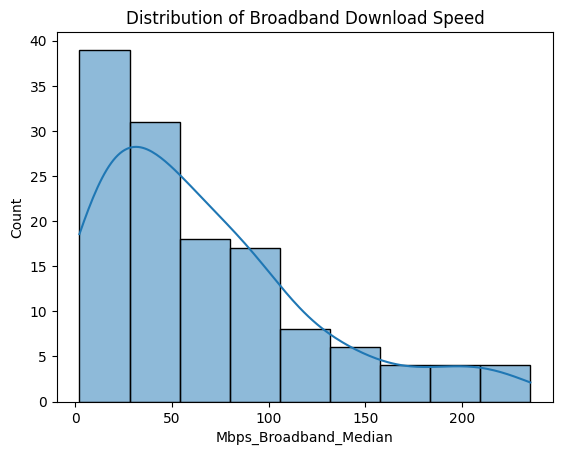

In [22]:
sns.histplot(data=countrydf, x = 'Mbps_Broadband_Median', kde= True)
plt.title('Distribution of Broadband Download Speed')

Text(0.5, 1.0, 'Distribution of Mobile Download Speed')

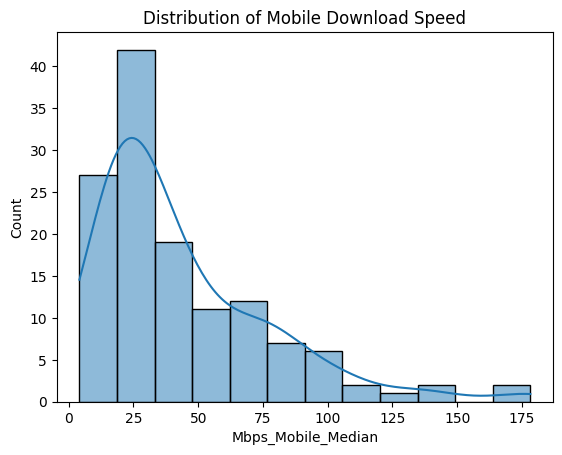

In [23]:
sns.histplot(data=countrydf, x = 'Mbps_Mobile_Median', kde = True)
plt.title('Distribution of Mobile Download Speed')

Text(0.5, 1.0, 'Distribution of UNCTAD Overall Index')

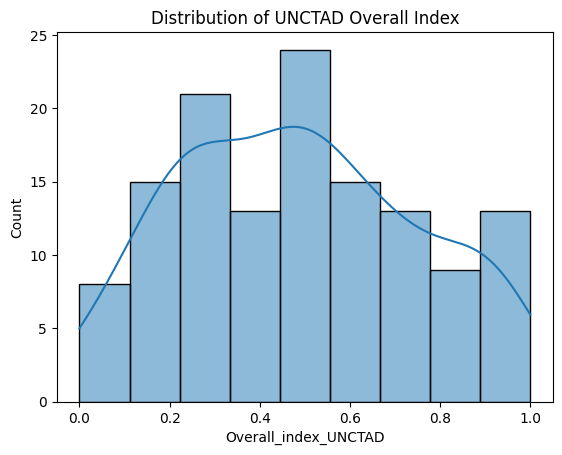

In [24]:
sns.histplot(data=countrydf, x = 'Overall_index_UNCTAD', kde = True)
plt.title('Distribution of UNCTAD Overall Index')

Distribution of Broadband Download Speed and Mobile Download Speeds are positively skewed with means of 67.32 and 43.94 respectively, and medians of 52.9 and 31.1 respectively.  Median download speed range from 2.23 to 235.4 Mbps for Broadband and 4.14 to 178.25 Mbps for Mobile.  The distribution of median download speeds are not normally distributed globally with median download speeds largely less than ~ 100 Mbps.  We see that broadband speeds have and widers distribution with minimum and maximum values beyond mobile speeds.

Distribution of UNCTAD Overall Index is approximately symmetrical around the mean of 0.49 and median of 0.47; values range from 0 to 1.  A normal distribution is approached.

Text(0.5, 1.0, 'Distribution of Broadband Download Speed')

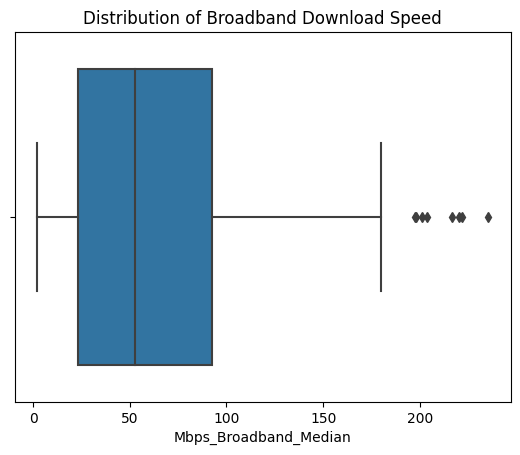

In [25]:
sns.boxplot(data=countrydf, x = 'Mbps_Broadband_Median')
plt.title('Distribution of Broadband Download Speed')

Text(0.5, 1.0, 'Distribution of Mobile Download Speed')

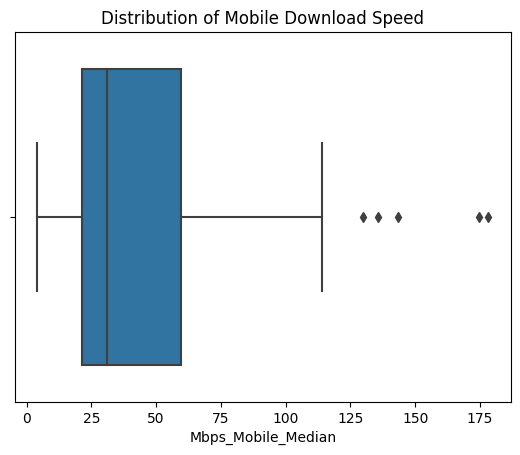

In [26]:
sns.boxplot(data=countrydf, x = 'Mbps_Mobile_Median')
plt.title('Distribution of Mobile Download Speed')

Text(0.5, 1.0, 'Distribution of UNCTAD Overall Index')

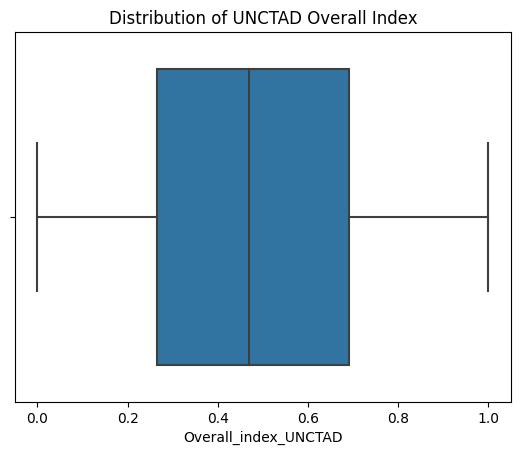

In [27]:
sns.boxplot(data=countrydf, x = 'Overall_index_UNCTAD')
plt.title('Distribution of UNCTAD Overall Index')

Country Broadband and Mobile median download speeds display potential outliers above ~200 Mbps and ~125 Mbps respectively.  The larger standard deviation in Broadband is apparent at 55.89, while for Mobile the standard deviation is 33.82.  Median Broadband speeds are more widely spread about the mean compared to Mobile speeds.

Overall index does not have any apparent outliers, as expected.

# Correlation

Text(0.5, 1.0, 'Median Broadband Download Speed versus Median Mobile Speed')

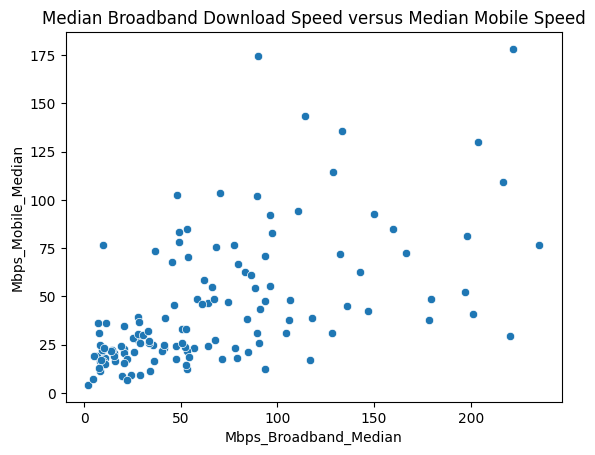

In [30]:
sns.scatterplot(data=countrydf, x = 'Mbps_Broadband_Median', y = 'Mbps_Mobile_Median')
plt.title('Median Broadband Download Speed versus Median Mobile Speed')

Text(0.5, 1.0, 'Median Broadband Download Speed versus UNCTAD Overall Index')

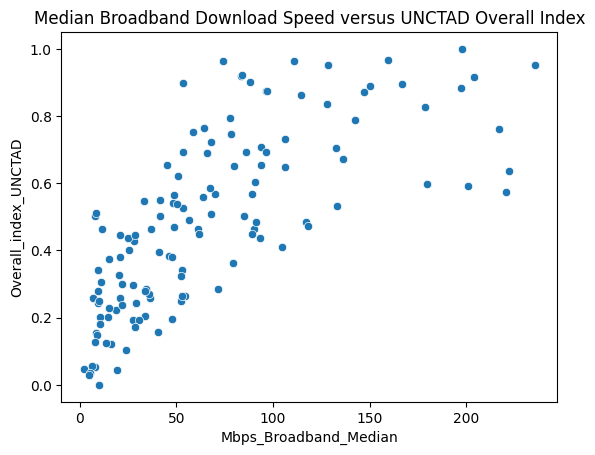

In [28]:
sns.scatterplot(data=countrydf, x = 'Mbps_Broadband_Median', y = 'Overall_index_UNCTAD')
plt.title('Median Broadband Download Speed versus UNCTAD Overall Index')

Text(0.5, 1.0, 'Median Mobile Download Speed versus UNCTAD Overall Index')

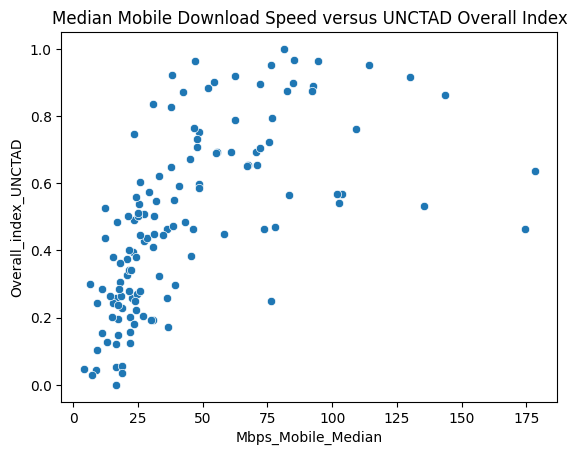

In [29]:
sns.scatterplot(data=countrydf, x = 'Mbps_Mobile_Median', y = 'Overall_index_UNCTAD')
plt.title('Median Mobile Download Speed versus UNCTAD Overall Index')

<Axes: >

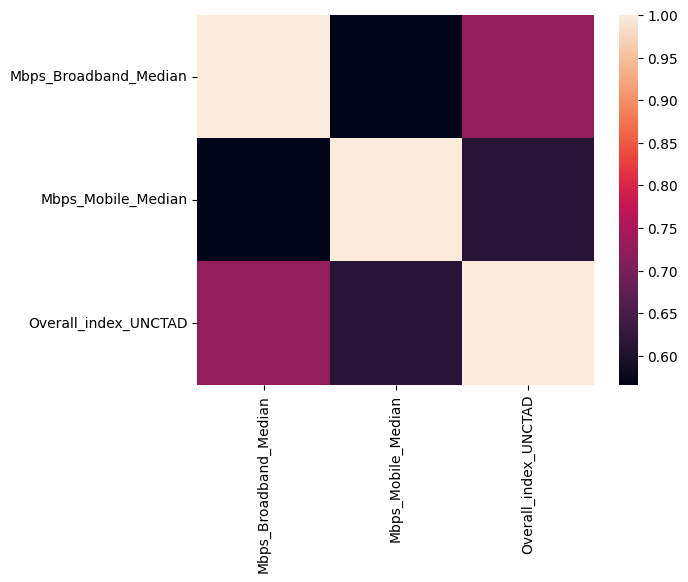

In [32]:
a = countrydf.loc[:,['Mbps_Broadband_Median', 'Mbps_Mobile_Median', 'Overall_index_UNCTAD']]
sns.heatmap(a.corr())

The relationship between Broadband and Mobile speeds can be described as a positive correlation, with larger values.  Faster Broadband speed does equate to faster Mobile speeds, and vice versa.

The correlations between Broadband and Mobile speeds and the Overall Index are moderately strong, with Broadband speed having a possible stronger relationship to the Overall Index.  The Overall Index does include the 

# Breaking Down the Overall Index
* Skills: Index to assess the level of relevant skills for using, adopting and adapting frontier technologies.  Indicators included in the index: Expected years of schooling from UNDP (accessed on 2 December 2019) and High-skill employment (percentage of working population) from ILO (accessed on 2 December 2019). 
* Research and Development: Index to assess the level of R&D capacity for using, adopting and adapting frontier technologies.  Year 2008 - Indicators included in the index: Number of scientific publications on frontier technologies from SCOPUS (accessed on 6 January 2021) and Number of patents filed on frontier technologies from PatSeer (accessed on 6 January 2021). 
* Industry activity: Index to assess the level of relevant industrial capacity for using, adopting and adapting frontier technologies.  Indicators included in the index: High-technology manufactures export (percentage of total merchandise trade) and Digitally deliverable services exports (percentage of total service trade) from UNCTADStat (accessed on 5 December2019). 
* Access to finance: Index to assess the availability of finance to the private sector. Indicators included in the index: Domestic credit to private sector (percentage of GDP) from WB/IMF/OECD (accessed on 20 January 2020). 
* Source: [UNCTAD](https://unctadstat.unctad.org/wds)

Text(0.5, 1.0, 'Median Broadband Speed versus UNCTAD Skills Measure')

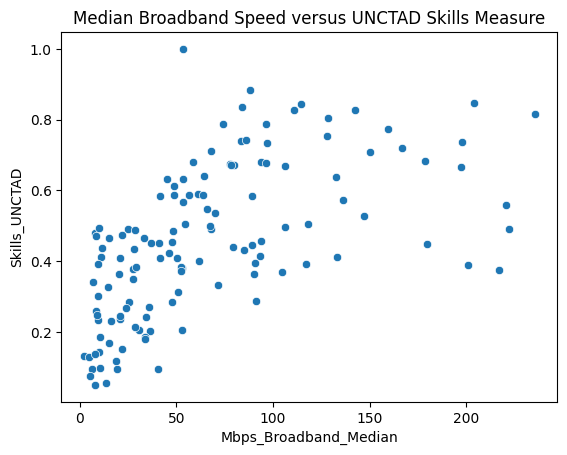

In [34]:
sns.scatterplot(data = countrydf, x = 'Mbps_Broadband_Median', y = 'Skills_UNCTAD')
plt.title('Median Broadband Speed versus UNCTAD Skills Measure')

Text(0.5, 1.0, 'Median Broadband Speed versus UNCTAD Research and Development Measure')

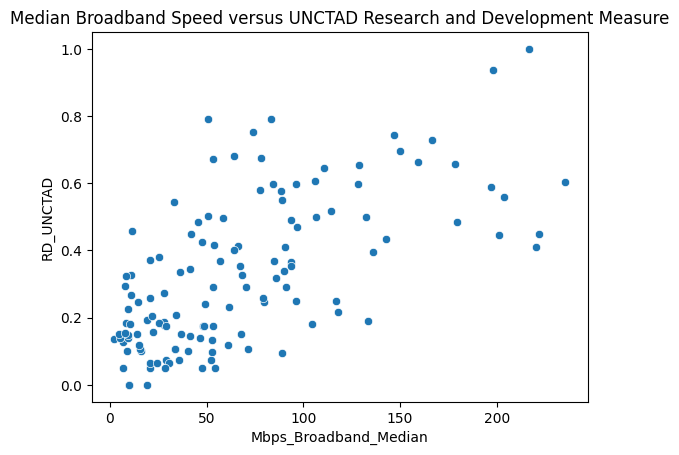

In [35]:
sns.scatterplot(data = countrydf, x = 'Mbps_Broadband_Median', y = 'RD_UNCTAD')
plt.title('Median Broadband Speed versus UNCTAD Research and Development Measure')

Text(0.5, 1.0, 'Median Broadband Speed versus UNCTAD Industry Activity Measure')

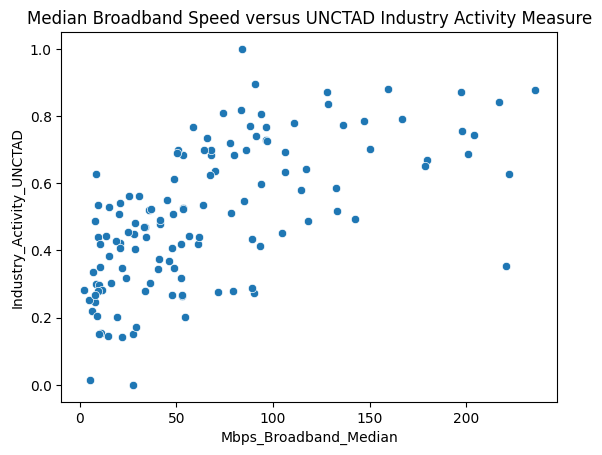

In [36]:
sns.scatterplot(data = countrydf, x = 'Mbps_Broadband_Median', y = 'Industry_Activity_UNCTAD')
plt.title('Median Broadband Speed versus UNCTAD Industry Activity Measure')

Text(0.5, 1.0, 'Median Broadband Speed versus UNCTAD Access to Finance Measure')

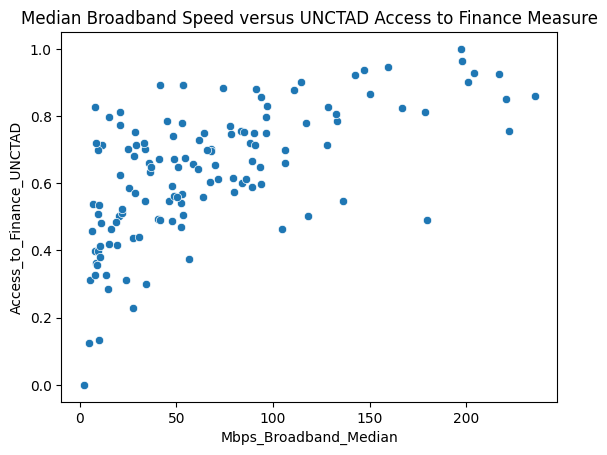

In [37]:
sns.scatterplot(data = countrydf, x = 'Mbps_Broadband_Median', y = 'Access_to_Finance_UNCTAD')
plt.title('Median Broadband Speed versus UNCTAD Access to Finance Measure')

Text(0.5, 1.0, 'Median Mobile Speed versus UNCTAD Skills Measure')

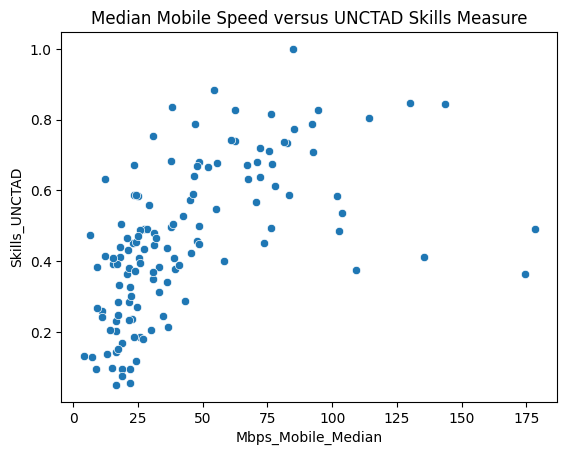

In [38]:
sns.scatterplot(data = countrydf, x = 'Mbps_Mobile_Median', y = 'Skills_UNCTAD')
plt.title('Median Mobile Speed versus UNCTAD Skills Measure')

Text(0.5, 1.0, 'Median Mobile Speed versus UNCTAD Research and Development Measure')

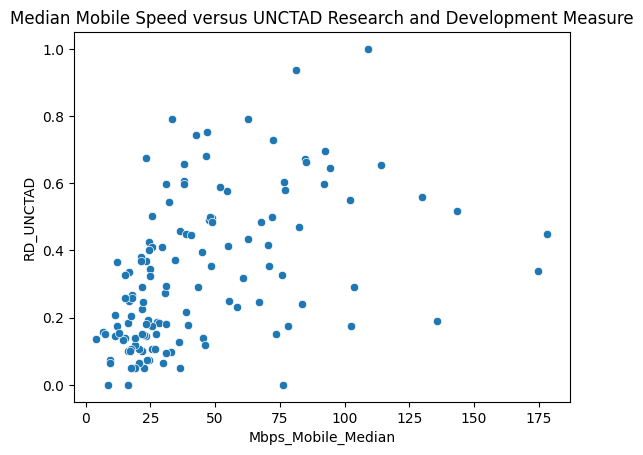

In [39]:
sns.scatterplot(data = countrydf, x = 'Mbps_Mobile_Median', y = 'RD_UNCTAD')
plt.title('Median Mobile Speed versus UNCTAD Research and Development Measure')

Text(0.5, 1.0, 'Median Mobile Speed versus UNCTAD Industry Activity Measure')

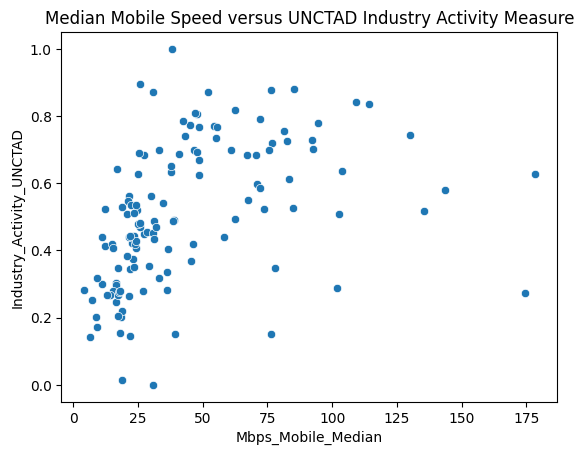

In [40]:
sns.scatterplot(data = countrydf, x = 'Mbps_Mobile_Median', y = 'Industry_Activity_UNCTAD')
plt.title('Median Mobile Speed versus UNCTAD Industry Activity Measure')

Text(0.5, 1.0, 'Median Mobile Speed versus UNCTAD Access to Finance Measure')

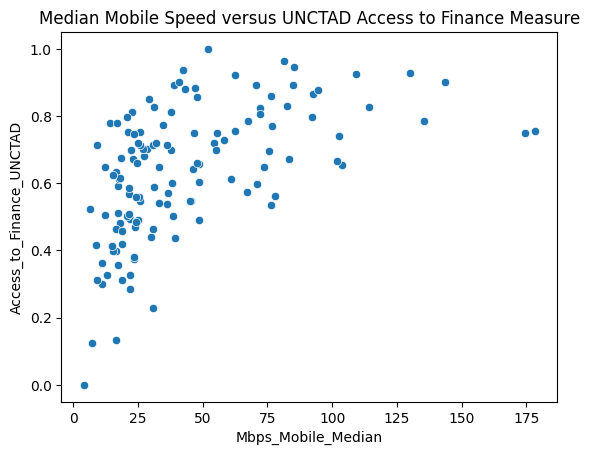

In [41]:
sns.scatterplot(data = countrydf, x = 'Mbps_Mobile_Median', y = 'Access_to_Finance_UNCTAD')
plt.title('Median Mobile Speed versus UNCTAD Access to Finance Measure')

<Axes: >

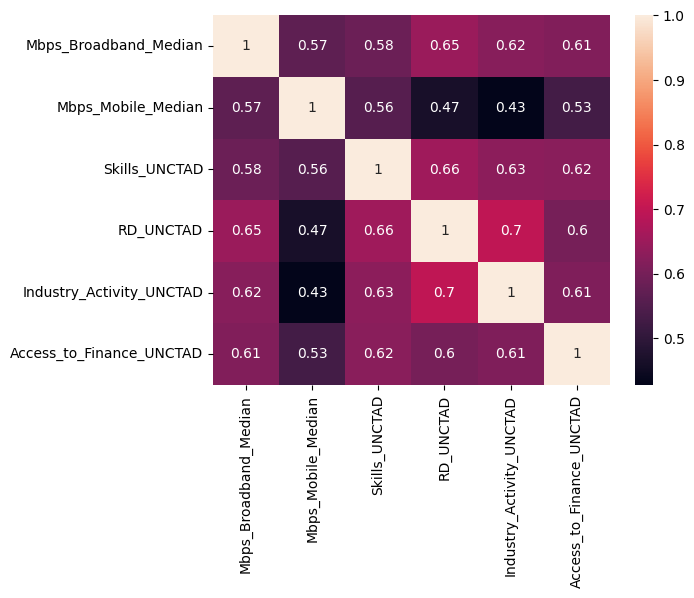

In [46]:
a = countrydf.loc[:,['Mbps_Broadband_Median', 'Mbps_Mobile_Median', 'Skills_UNCTAD',
       'RD_UNCTAD', 'Industry_Activity_UNCTAD', 'Access_to_Finance_UNCTAD']]
acorr = a.corr()
sns.heatmap(acorr, annot = True)

We see that Median Broadband Speed is most strongly correlated with Research and Development in that country.  While, among the indicators, Median Mobile Speed is most strongly correlated with Access to Finance in that country; however, Mobile Speed is more strongly correlated with Broadband speed than any of the individual measures.  All of the individual measures contribute to the relationship between speed and overall index to a similar extent, with skill and education of the workforce being the smallest contributor.  This could be both because a skilled workforce lives in a low internet performance country and because some high internet performance countries have a higher proportion of unskilled individuals.

# Countries

In [47]:
# create a population column
!pip install pycountry
!pip install pypopulation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 69.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=46960e5536b5b655244e92586f628a132147934423ba34b5bd74042ba16e6cde
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pycountry
import pypopulation

In [119]:
df2 = countrydf.copy()

In [120]:
mapping = {country.name: country.alpha_2 for country in pycountry.countries}
print(mapping)

{'Aruba': 'AW', 'Afghanistan': 'AF', 'Angola': 'AO', 'Anguilla': 'AI', 'Åland Islands': 'AX', 'Albania': 'AL', 'Andorra': 'AD', 'United Arab Emirates': 'AE', 'Argentina': 'AR', 'Armenia': 'AM', 'American Samoa': 'AS', 'Antarctica': 'AQ', 'French Southern Territories': 'TF', 'Antigua and Barbuda': 'AG', 'Australia': 'AU', 'Austria': 'AT', 'Azerbaijan': 'AZ', 'Burundi': 'BI', 'Belgium': 'BE', 'Benin': 'BJ', 'Bonaire, Sint Eustatius and Saba': 'BQ', 'Burkina Faso': 'BF', 'Bangladesh': 'BD', 'Bulgaria': 'BG', 'Bahrain': 'BH', 'Bahamas': 'BS', 'Bosnia and Herzegovina': 'BA', 'Saint Barthélemy': 'BL', 'Belarus': 'BY', 'Belize': 'BZ', 'Bermuda': 'BM', 'Bolivia, Plurinational State of': 'BO', 'Brazil': 'BR', 'Barbados': 'BB', 'Brunei Darussalam': 'BN', 'Bhutan': 'BT', 'Bouvet Island': 'BV', 'Botswana': 'BW', 'Central African Republic': 'CF', 'Canada': 'CA', 'Cocos (Keeling) Islands': 'CC', 'Switzerland': 'CH', 'Chile': 'CL', 'China': 'CN', "Côte d'Ivoire": 'CI', 'Cameroon': 'CM', 'Congo, The D

In [121]:
dfc = pd.DataFrame([mapping])
dfc = dfc.T.reset_index(names=['Country'])
dfc = dfc.replace({'Viet Nam': 'Vietnam', 'Venezuela, Bolivarian Republic of': 'Bolivia', 
                  'Tanzania, United Republic of': 'Tanzania', 'Taiwan, Province of China': 'Taiwan',
                  'Syrian Arab Republic': 'Syria', 'Russian Federation': 'Russia', 'Palestine, State of': 'Palestine',
                  "Korea, Democratic People's Republic of": 'South Korea ROK', 'Moldova, Republic of': 'Moldova',
                  "Lao People's Democratic Republic": 'Laos', 'Iran, Islamic Republic of': 'Iran', 'Hong Kong': 'Hong Kong SAR',
                  'Congo, The Democratic Republic of the': 'DR Congo', "Côte d'Ivoire": "Cote d'Ivoire", 'Macao': 'Macau SAR',
                   'Brunei Darussalam': 'Brunei', 'Venezuela, Bolivarian Republic of': 'Venezuela',
                   'Bolivia, Plurinational State of': 'Bolivia'})
dfc.columns = ['Country', 'Code']
dfc.head()

,Country,Code
0,Aruba,AW
1,Afghanistan,AF
2,Angola,AO
3,Anguilla,AI
4,Åland Islands,AX


In [122]:
pops = []
for c in dfc.Code:
  pop = pypopulation.get_population(c)
  pops.append(pop)
dfc['Population'] = pops

In [123]:
c = countrydf.merge(dfc, how='left')

In [125]:
c[c['Population'].isna()] # display any rows without populations

,Country,Mbps_Broadband_Median,Mbps_Mobile_Median,MonthYear_Reported_Speedtest,Overall_index_UNCTAD,Skills_UNCTAD,RD_UNCTAD,Industry_Activity_UNCTAD,Access_to_Finance_UNCTAD,Year_Reported_UNCTAD,Code,Population


In [126]:
# export excel files to save if desired
countrydatapopulation = c.to_excel('countrydatapopulation.xlsx', index=False)

In [127]:
citydata = citydf.to_excel('citydf.xlsx', index=False)